# Lab 9
### Author: Quentin Smith
### Due Date: 3/31

## 1. Overview

#### Obejctive: 
Compare two clustering models for same dataset in Python and evaluate and interpret models. 

**Background:**

**Clustering** is an unsupervised learning process of dividing the entire data into groups (also known as clusters) based on patterns in the data [1]. 

**Evaluation Metrics for clustering:**

Two ways to evaluate how well the clustering have been divided are Inertia and Dunn Index:

1. **Inertia** tells us the sum of how far the points within a cluster are from the centroid of that cluster. The lower the inertia number the better the clusters are. 

2. The **Dunn Index** takes into the account the distance between two clusters. It is the ratio between the minimum inter cluster distance over the max intra cluster distance. The higher the inter-cluster distance the better the clusters are

**K-Means Clustering:**

K-Means Clustering tries to minimize the distance of the points in a cluster with their centroid. There are a few challenges when implementing this algorithm. Density differnces and size differences between clusters is a challenge to K-Means. A solution to this is to use a higher number of clusters, but this rasises a question of exactly what should we pick for our K value and where should we initiate the centoid to be?

**K-Means++** is a way to initialize the centroids of the cluster to improve clusters. This process is computationally costsly relative to random initialization. 

How do we pick the right amount of clusters? The highest amount of clusters we can choose is equal to the number of observations in the dataset. We can graph the inertia based on the clusters from 1 to the max amount of clusters and use the **elbow method** in deciding how many clusters we choose. To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion [2]. 

**Agglomerative Hierarchical Clustering** is a way to build a heirarchy of clusters by using the closest pair at each iteration until a single cluster is left. The heirarchical structure can be shown using a dendrogram. The longer a line is vertical the more different it is. The number of clusters is determined by giving intersecting vertical lines of a dendrogram with a threshold line [3]. 

**Density-based spatial clustering of application with noise (DBSCAN)** groups together points that are close to each other based on a distance measurement and a minimum number of points. It also marks the points in low-density regions as outliers [4]. 


**Resources:**
1. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
2. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
3. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
4. https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80

## 2. Data

**Data Overview:**

The data describes customer data of a wholesale grocery store distributer in Portugal. It includes the annual spending in monetary units (m.u.) on diverse product categories. 

Attribute Information:

1. FRESH: annual spending (m.u.) on fresh products (Continuous);
2. MILK: annual spending (m.u.) on milk products (Continuous);
3. GROCERY: annual spending (m.u.)on grocery products (Continuous);
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7. CHANNEL: Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
8. REGION: Region “Lisnon, Oporto or Other" (Nominal)

**Data Resource:**

https://archive.ics.uci.edu/ml/datasets/wholesale+customers

Direct Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
# import data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
df.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [3]:
#Region and Channel Frequency
count = df['Channel'].value_counts() 
print('Frequency of Channel outputs:\n', count) 

count1 = df['Region'].value_counts()
print('\nFrequency of Region outputs:\n', count1)

Frequency of Channel outputs:
 1    298
2    142
Name: Channel, dtype: int64

Frequency of Region outputs:
 3    316
1     77
2     47
Name: Region, dtype: int64


In [ ]:
#statistics
df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


We can see the magnitudes of the different variables vary quite a bit. We will need to standardize or normalize the data.

 ## 3. EDA

**Question 4:**

As seen above from our df.describe() the magnitudes are very different between the different variables. Since K-Means is a distance based algorithm we need to bring all the variables to the same magnitude by standardizing it. 

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Now that the magnitudes look similar let us run our kmeans function and fit the data. 

## 4. Models

### 4.a) K-Means Clustering

In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# inertia on the fitted data
kmeans.inertia_

2599.3873849123083

This is a very high inertia. When dealing with inertia we want the a value close to 0. Let us use the elbow method to determine the amount of clusters needed.

Text(0, 0.5, 'Inertia')

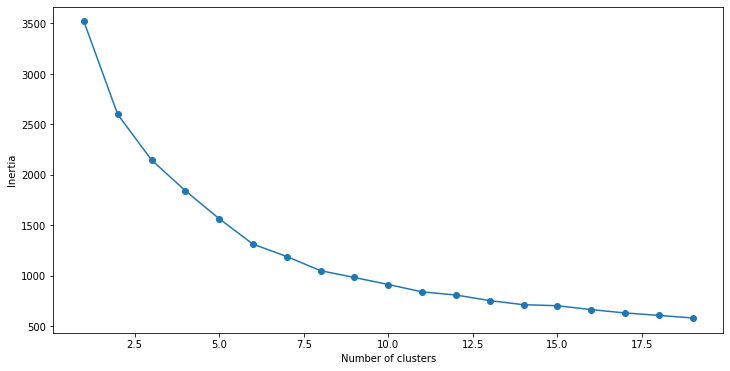

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looking it is a bit hard to tell what the elbow of the graph is. I would say between 5 and 9 clusters would explain a good percentage of the variance. Let us use 7 clusters

In [ ]:
# k means using 7 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    164
1    124
3     85
0     52
4     11
2      3
6      1
Name: cluster, dtype: int64

In [ ]:
frame.head(5)

,0,1,2,3,4,5,6,7,cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1


#### Boxplots of Clusters

Let us see if we can see infer any more information by plotting boxplots of each variable in each cluster. 

In [ ]:
#Create a new df we can make a boxplot out of per cluster
cluster0 = frame.loc[frame['cluster'] == 0]
cluster1 = frame.loc[frame['cluster'] == 1]
cluster2 = frame.loc[frame['cluster'] == 2]
cluster3 = frame.loc[frame['cluster'] == 3]
cluster4 = frame.loc[frame['cluster'] == 4]
cluster5 = frame.loc[frame['cluster'] == 5]
cluster6 = frame.loc[frame['cluster'] == 6]

Frequency of Channel outputs:
 -0.690297    49
 1.448652     3
Name: 0, dtype: int64

Frequency of Region outputs:
  0.590668    46
-1.995342     4
-0.702337     2
Name: 1, dtype: int64


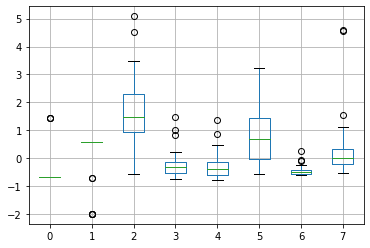

In [ ]:
#cluster 0 boxplot
cluster0.boxplot(column=[0,1,2,3,4,5,6,7])

#Region and Channel Frequency
count = cluster0[0].value_counts() 
print('Frequency of Channel outputs:\n', count) 

count1 = cluster0[1].value_counts()
print('\nFrequency of Region outputs:\n', count1)

#### Thoughts:
We see the cluster 0 boxplot and frequencies are above:

column = 0 (Channel): There are 49 channel = 0

column = 1 (Region): The are 46 region = 3

column = 2 (Fresh):  Mean is around 1.5

column = 3 (Milk): Mean is around -0.25

column = 4 (Grocery): Mean is around -0.30

column = 5 (Frozen): Mean is around 0.75

column = 6 (Detergents_Paper): Mean is around -0.4

column = 7 (Delicassen): Mean is 0

Frequency of Channel outputs:
 1.448652    124
Name: 0, dtype: int64

Frequency of Region outputs:
  0.590668    95
-0.702337    17
-1.995342    12
Name: 1, dtype: int64


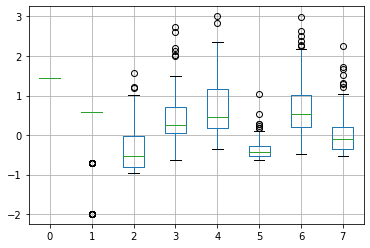

In [ ]:
#cluster 1 boxplot
cluster1.boxplot(column=[0,1,2,3,4,5,6,7])

#Region and Channel Frequency
count = cluster1[0].value_counts() 
print('Frequency of Channel outputs:\n', count) 

count1 = cluster1[1].value_counts()
print('\nFrequency of Region outputs:\n', count1)

#### Thoughts:
We see the cluster 1 boxplot and frequencies are above:

column = 0 (Channel): There are 124 channel = 1

column = 1 (Region): The are 95 region = 3

column = 2 (Fresh):  Mean is around -0.5

column = 3 (Milk): Mean is around 0.25

column = 4 (Grocery): Mean is around 0.4

column = 5 (Frozen): Mean is around -0.35

column = 6 (Detergents_Paper): Mean is around 0.5

column = 7 (Delicassen): Mean is -0.1

Frequency of Channel outputs:
 -0.690297    3
Name: 0, dtype: int64

Frequency of Region outputs:
  0.590668    2
-0.702337    1
Name: 1, dtype: int64


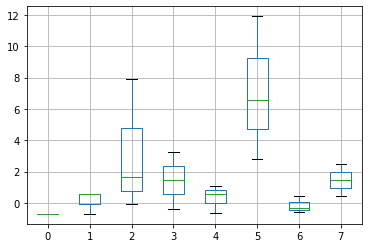

In [ ]:
#cluster 2 boxplot
cluster2.boxplot(column=[0,1,2,3,4,5,6,7])

#Region and Channel Frequency
count = cluster2[0].value_counts() 
print('Frequency of Channel outputs:\n', count) 

count1 = cluster2[1].value_counts()
print('\nFrequency of Region outputs:\n', count1)

#### Thoughts:
We see the cluster 2 boxplot and frequencies are above:

column = 0 (Channel): There are 3 channel = 0

column = 1 (Region): The are 2 region = 3

column = 2 (Fresh):  Mean is around 1.8

column = 3 (Milk): Mean is around 1.75

column = 4 (Grocery): Mean is around 0.8

column = 5 (Frozen): Mean is around 6.5

column = 6 (Detergents_Paper): Mean is around -0.2

column = 7 (Delicassen): Mean is 1.75

Frequency of Channel outputs:
 -0.690297    81
 1.448652     4
Name: 0, dtype: int64

Frequency of Region outputs:
 -1.995342    59
-0.702337    26
Name: 1, dtype: int64


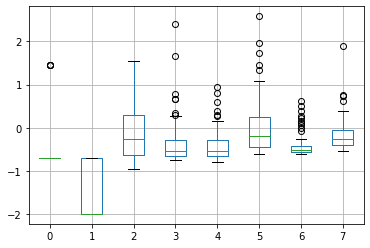

In [ ]:
#cluster 3 boxplot
cluster3.boxplot(column=[0,1,2,3,4,5,6,7])

#Region and Channel Frequency
count = cluster3[0].value_counts() 
print('Frequency of Channel outputs:\n', count) 

count1 = cluster3[1].value_counts()
print('\nFrequency of Region outputs:\n', count1)

#### Thoughts:
We see the cluster 3 boxplot and frequencies are above:

column = 0 (Channel): There are 81 channel = 0

column = 1 (Region): The are 59 region = 0

column = 2 (Fresh):  Mean is around -0.25

column = 3 (Milk): Mean is around -0.5

column = 4 (Grocery): Mean is around -0.5

column = 5 (Frozen): Mean is around -0.2

column = 6 (Detergents_Paper): Mean is around -0.5

column = 7 (Delicassen): Mean is -0.25

Frequency of Channel outputs:
 1.448652    11
Name: 0, dtype: int64

Frequency of Region outputs:
  0.590668    8
-1.995342    2
-0.702337    1
Name: 1, dtype: int64


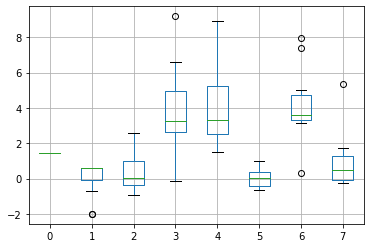

In [ ]:
#cluster 4 boxplot
cluster4.boxplot(column=[0,1,2,3,4,5,6,7])

#Region and Channel Frequency
count = cluster4[0].value_counts() 
print('Frequency of Channel outputs:\n', count) 

count1 = cluster4[1].value_counts()
print('\nFrequency of Region outputs:\n', count1)

#### Thoughts:
We see the cluster 4 boxplot and frequencies are above:

column = 0 (Channel): There are 11 channel = 1

column = 1 (Region): The are 8 region = 3

column = 2 (Fresh):  Mean is around 0

column = 3 (Milk): Mean is around 3

column = 4 (Grocery): Mean is around 3

column = 5 (Frozen): Mean is around 0

column = 6 (Detergents_Paper): Mean is around 3.5

column = 7 (Delicassen): Mean is 0.5

Frequency of Channel outputs:
 -0.690297    164
Name: 0, dtype: int64

Frequency of Region outputs:
 0.590668    164
Name: 1, dtype: int64


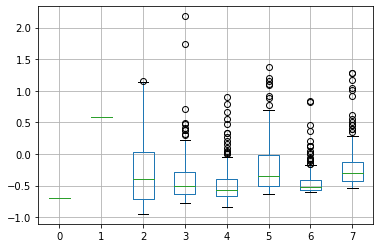

In [ ]:
#cluster 5 boxplot
cluster5.boxplot(column=[0,1,2,3,4,5,6,7])

#Region and Channel Frequency
count = cluster5[0].value_counts() 
print('Frequency of Channel outputs:\n', count) 

count1 = cluster5[1].value_counts()
print('\nFrequency of Region outputs:\n', count1)

#### Thoughts:
We see the cluster 5 boxplot and frequencies are above:

column = 0 (Channel): There are 164 channel = 0

column = 1 (Region): The are 164 region = 3

column = 2 (Fresh):  Mean is around -0.4

column = 3 (Milk): Mean is around -0.5

column = 4 (Grocery): Mean is around -0.6

column = 5 (Frozen): Mean is around -0.3

column = 6 (Detergents_Paper): Mean is around -0.5

column = 7 (Delicassen): Mean is -0.25

Frequency of Channel outputs:
 -0.690297    1
Name: 0, dtype: int64

Frequency of Region outputs:
 0.590668    1
Name: 1, dtype: int64


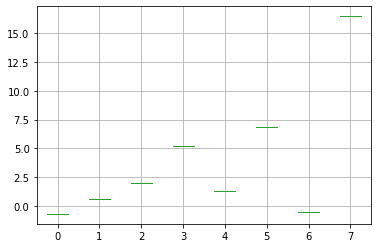

In [ ]:
#cluster 6 boxplot
cluster6.boxplot(column=[0,1,2,3,4,5,6,7])

#Region and Channel Frequency
count = cluster6[0].value_counts() 
print('Frequency of Channel outputs:\n', count) 

count1 = cluster6[1].value_counts()
print('\nFrequency of Region outputs:\n', count1)

#### Thoughts:
We see the cluster 6 boxplot and frequencies are above:

column = 0 (Channel): There are 1 channel = 0

column = 1 (Region): The are 1 region = 3

column = 2 (Fresh):  Mean is around 2

column = 3 (Milk): Mean is around 5

column = 4 (Grocery): Mean is around 1.5

column = 5 (Frozen): Mean is around 7

column = 6 (Detergents_Paper): Mean is around -0.2

column = 7 (Delicassen): Mean is 17

##### Conclusion:
Looking at the means and range of each cluster for individual variables it looks like each cluster represents the biggest purchasers in specific areas based on m.u of the certain category. It lists the distribution of channel and region for the specific cluster. 

Let us look at the difference between each cluster for specific columns

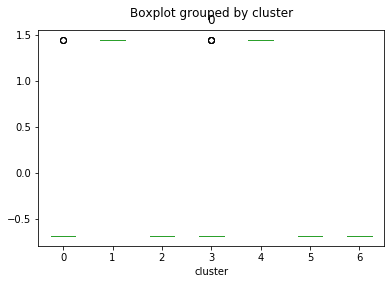

In [ ]:
#Column == 0 (Channel)
(frame.boxplot(by ='cluster', column = [0], grid = False))

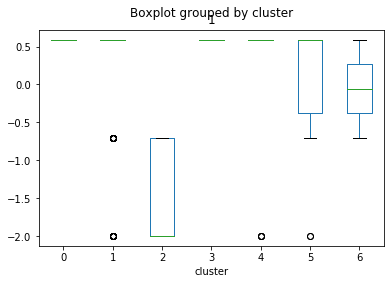

In [ ]:
#Column == 1 (Region)
(frame.boxplot(by ='cluster', column =[1], grid = False))

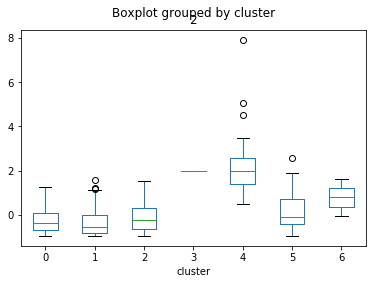

In [ ]:
#Column == 2 (Fresh)
(frame.boxplot(by ='cluster', column =[2], grid = False))

We can see here that cluster 3 and 4 perform well in the region of Fresh. 

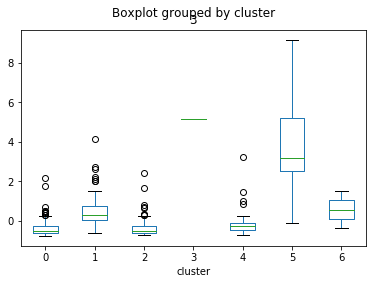

In [ ]:
#Column == 3 (Milk)
(frame.boxplot(by ='cluster', column =[3], grid = False))

While having a big range (cluster 5) we see that cluster 5 and cluster 3 are doing well in Milk

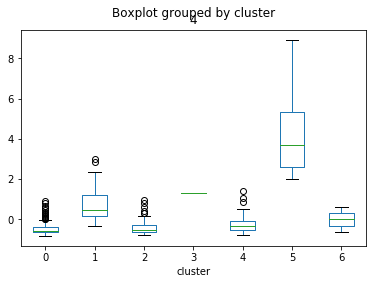

In [ ]:
#Column == 4 (Grocery)
(frame.boxplot(by ='cluster', column =[4], grid = False))

Cluster 5 and cluster 3 are also doing well in Grocery

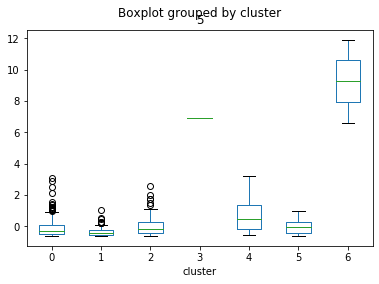

In [ ]:
#Column == 5 (Frozen)
(frame.boxplot(by ='cluster', column =[5], grid = False))

Cluster 6 and cluster 3 are doing well in the case of Frozen

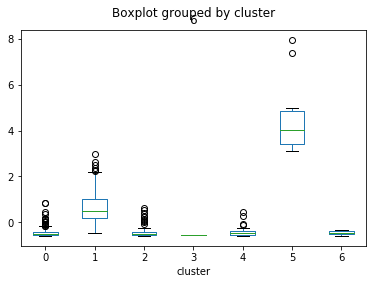

In [ ]:
#Column == 6 (Detergents_Paper)
(frame.boxplot(by ='cluster', column =[6], grid = False))

Cluster 5 is doing well in Detergents_Paper

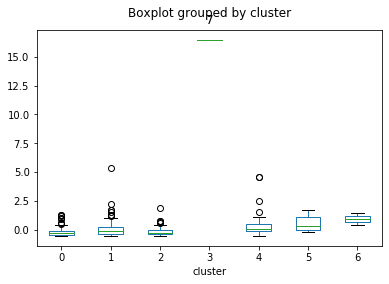

In [ ]:
#Column == 7 (Delicassen)
(frame.boxplot(by ='cluster', column =[7], grid = False))

And lastly cluster 3 is doing the best in delicassen

### Evaluation Measure: silhouette analysis

In [ ]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
  
# Generating the sample data from make_blobs 
  
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(data_scaled) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(data_scaled, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.37323636511581165
For no of clusters = 3  The average silhouette_score is : 0.3567685389017652
For no of clusters = 4  The average silhouette_score is : 0.3659611155778717
For no of clusters = 5  The average silhouette_score is : 0.35721008796167153
For no of clusters = 6  The average silhouette_score is : 0.3567871380525514
For no of clusters = 7  The average silhouette_score is : 0.3613380457051018
For no of clusters = 8  The average silhouette_score is : 0.36371309775006333
For no of clusters = 9  The average silhouette_score is : 0.3671090215557249
For no of clusters = 10  The average silhouette_score is : 0.34711139109448447
For no of clusters = 11  The average silhouette_score is : 0.2799334296154532
For no of clusters = 12  The average silhouette_score is : 0.29512490172256395
For no of clusters = 13  The average silhouette_score is : 0.32029034560973385
For no of clusters = 14  The average silhouette_score is : 0.33918

The evaluation measure silhouette analysis tells us that this group of data has a slight positive for similarity to its own cluster. The best clustering numbers to use is 2, 4, 7, 8, 9. They are all around 0.36-0.375

### 4.b) Agglomerative Hierarchical Clustering

The evaluation measure from the K-Means left me with a question. Why are the best clustering numbers to use 2, 4, 7, 8, 9 when the elbow test looked like it needed to be between 6-9? I figured hierarchical data could show a bit more into what I was seeing. I found this resource below to help me through the code 

Resource: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The same techniques are involved just like in K-Means. We first have to preprocess the data. In this example we are going to normalize the data instead of standardize it. 

**Normalization** means to scale the variable to values between 0 and 1

**Standardization** means to transform the data to have a mean of zero and a standard deviation of 1

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


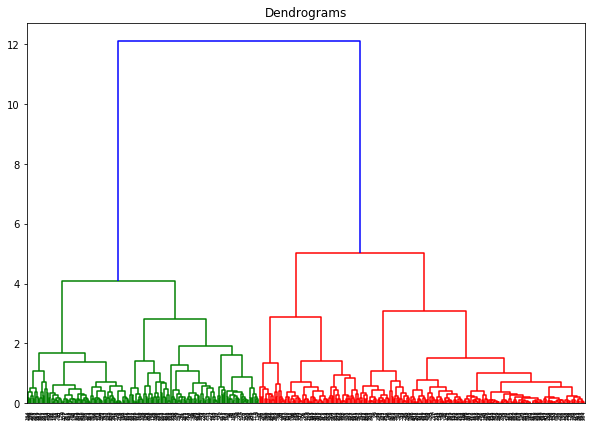

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x axis contains the samples and y axis represents the distance between these samples. We will add a horizontal line for a threshold of 6. 

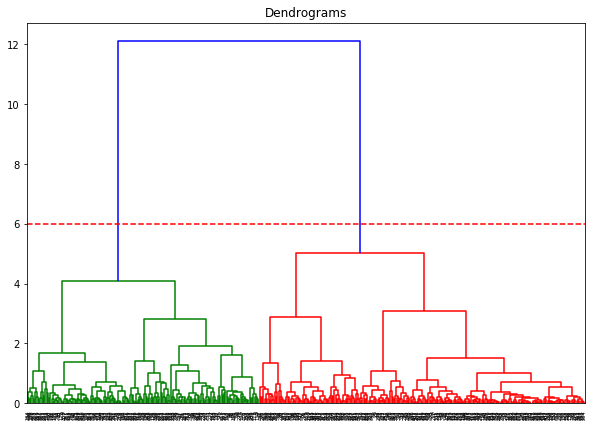

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

This leaves us with two clusters. Let us apply hierarchical clustering for 2 clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_labels =cluster.fit_predict(data_scaled)

In [ ]:
silhouette_avg = silhouette_score(data_scaled, cluster_labels) 
print('silhouette score =',silhouette_avg)

silhouette score = 0.49090467744510174


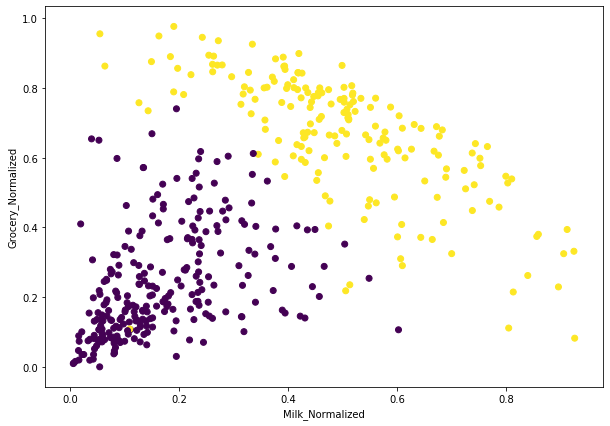

In [ ]:
plt.figure(figsize=(10, 7))  
plt.xlabel("Milk_Normalized")
plt.ylabel("Grocery_Normalized")
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

We can clearly see the two clusters between milk and grocery

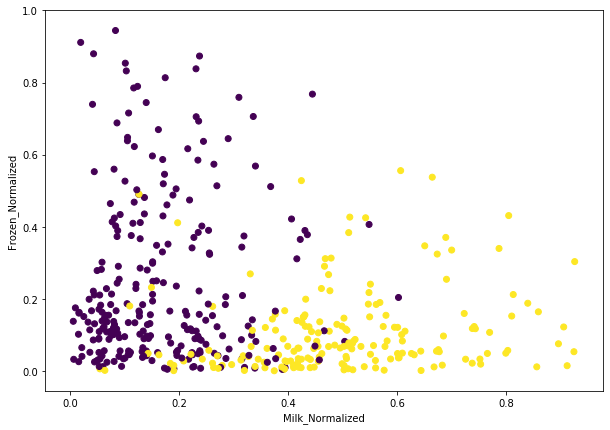

In [ ]:
plt.figure(figsize=(10, 7))  
plt.xlabel("Milk_Normalized")
plt.ylabel("Frozen_Normalized")
plt.scatter(data_scaled['Milk'], data_scaled['Frozen'], c=cluster.labels_) 

In this example you can see that there are two clusters but they overlap a bit.

#### Thoughts:
By using Agglomerative Hierarchical Clustering we can clearly see the biggest difference (longest vertical line) between potential groups is the first split top to bottom (blue line) in the dendrogram. 

Agglomerative heirarchical clustering with 2 clusters clearly shows the two seperate clusters with a bit of overlap when comparing certain features. 



### 4.c) DBSCAN

Using the same normalized data I am going to use DBSCAN to analyze and cluster the data. 

Estimated number of clusters: 1
Estimated number of noise points: 28
Silhouette Coefficient: 0.196


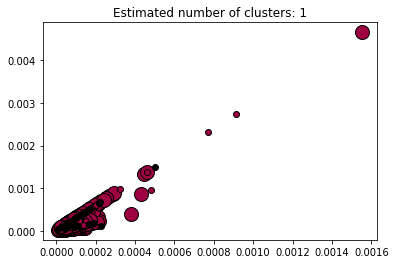

In [ ]:

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize


data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)


# Compute DBSCAN
db = DBSCAN(eps= 0.3, min_samples=15).fit(data_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data_scaled, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Initial Thoughts:
I am not entirely sure why it only estimates 1 cluster. Maybe this method is not a good choice for this data. More likely is that I did not use the model correctly. I am leaning towards the latter since it should have identified the outliers at least.  

## 5. Conclusions:

The data set is from a wholesale distributor. The rows are customers. Originally the dataset has 8 features: Fresh, Milk, Grocery, Frozen, Detergents, Delicatessen, Channel, and Region. We know the two variables Channel and Region are nominal values to describe the customer and should be taken out of the statistical analysis of the data. The rest of the variables are continuous and represent the money spent by each cutomer to buy that item from the wholesale distributor. Since the data is has verying magnitudes for the numbers we need to do a bit of preprocessing before diving into the unsupervised models. 

When running K-Means Clustering on the data set we opted to standardize the data. The amount of clusters was determined first by the elbow method, or the inertia at varying k clusters. The elbow method shows that a k of 5-9 clusters will describe a good portion of the variance. We chose 7 clusters and found the following sillhouette coefficients: 

For no of clusters = 2  The average silhouette_score is : 0.37323636511581165

For no of clusters = 3  The average silhouette_score is : 0.3567685389017652

For no of clusters = 4  The average silhouette_score is : 0.3659611155778717

For no of clusters = 5  The average silhouette_score is : 0.35721008796167153

For no of clusters = 6  The average silhouette_score is : 0.3567871380525514

For no of clusters = 7  The average silhouette_score is : 0.3613380457051018

For no of clusters = 8  The average silhouette_score is : 0.36371309775006333

For no of clusters = 9  The average silhouette_score is : 0.3671090215557249

For no of clusters = 10  The average silhouette_score is : 0.34711139109448447

These scores show that 2, 4, 7, 8, 9 clusters are ideal in this standardized data set. 

**What do the clusters mean exactly?**

Each cluster is identifying a group or customers that can be identified by the Channel and Region. Each cluster has their own spending habits for the 6 variables: Fresh, Milk, Grocery, Frozen, Detergents, Delicatessen. When we are performing this clustering on this data set, we are identifying who is most likely to buy what. 

The previous silhouette scores left me a bit confused. Why is 2 clusters an option if it wasn't in the elbow method range? I decided that the best way to see why this is, is by using Agglomerative Hierarchical Clustering. The heights on the dendrograms will show me the biggest differences between clusters. We normalized the original data this time to create a dendrogram. The last two clusters (blue line) show the biggest difference between two clusters. This is why the silhouette score came out the way it did. To visualize this further we ran the Agglomerative Hierarchical Clustering on the normalized data and plotted it out onto a scatterplot. There are two examples of clustering between the variables milk and grocery and milk and frozen. We can clearly see the clusters even if they overlap with certain pairs of variables. To invesitgate this further we might run a correlation plot between all the variables. This might give more insight into which pairs will ahve distinct clustering. 

We ran one last test on the data that didn't work as well. When running the DBSCAN which works with densities we had an ouput of only one cluster. I think this was just implemented wrong. I feel there should have at least been some outliers identified  during this model. 

#### In Conclusion:
I could see this being applied to finding which particular clusters (groups of customers based on location and channel) buy what things so the wholesale distributor can better sell their product. Currently with the work that I have done. I would use the Agglomerative Hierarchical Clustering to determine the groups since they seemed to be giving the highest silhouette score.

K-Means: clusters = 7, average silhouette score is : 0.3613380457051018

Agglomerative Hierarchical: clusters = 2, average silhouette score is : 0.49090467744510174

DBSCAN: clusters = 1, average silhouette score is : 0.196

#### Further Research:
I would like to be able to visualize more of the scatter plots. I was having some trouble while doing this. This would have given me a bit more intuition when looking at the data. 

I also need to re-look up the difference between standardization and normalization. Especially when to use either one.

Once, I ahve the models correctly built and the clusters chosen correctly it would be a pretty good idea to incorporate the channel and distance back into the models somehow. Showing grouping by region would be a good feature that would be important to a company. 